### Import necessary libraries and connect to Google Drive for file access and output storage.

In [74]:
# Adjusting current working directory to parent directory
from pathlib import Path
from os import chdir
from platform import system

try:
    current_directory
except: # First  run - initialize current_directory
    current_directory = Path.cwd()
    if system() == "Linux": # Colab
        from google.colab import drive
        drive.mount('/content/drive')
        current_directory = f"{current_directory}/drive/MyDrive/Colab Notebooks/RecTour2024Challenge"
    else:
        current_directory = current_directory.parent
finally:
    chdir(current_directory)


!pip install tabulate

# External imports
import pandas as pd
import numpy as np

from random import randint

# Internal imports
from src.data.csv_tools import csv_to_dataframe, dataframe_to_csv, save_submission
import matplotlib.pyplot as plt

### Loading the training data (reviews, users, and merged dataset)

In [75]:
train_reviews_df = csv_to_dataframe("train", "reviews")
train_users_df = csv_to_dataframe("train", "users")
train_merge = csv_to_dataframe("train")

### Visualizing missing values in review columns

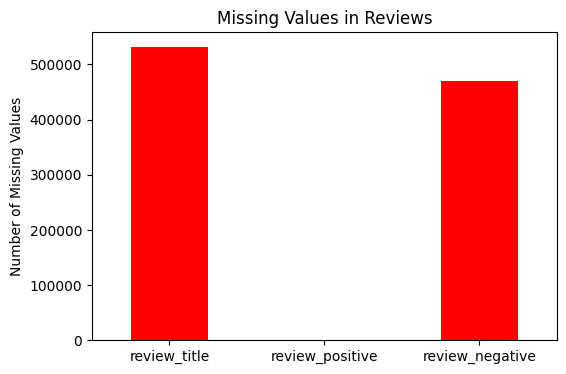

In [76]:
missing_values = train_reviews_df[["review_title", "review_positive", "review_negative"]].isna().sum()

plt.figure(figsize=(6, 4))
missing_values.plot(kind='bar', color='red')
plt.title('Missing Values in Reviews')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=0)
plt.show()

### Visualizing missing values in selected user features

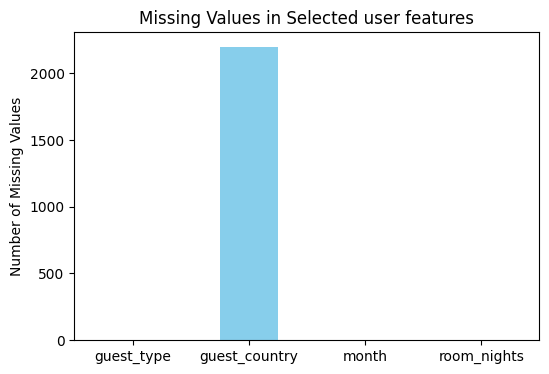

In [77]:
missing_values = train_users_df[['guest_type', 'guest_country', 'month', 'room_nights']].isna().sum()

plt.figure(figsize=(6, 4))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values in Selected user features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=0)
plt.show()

### Visualizing guest type distribution

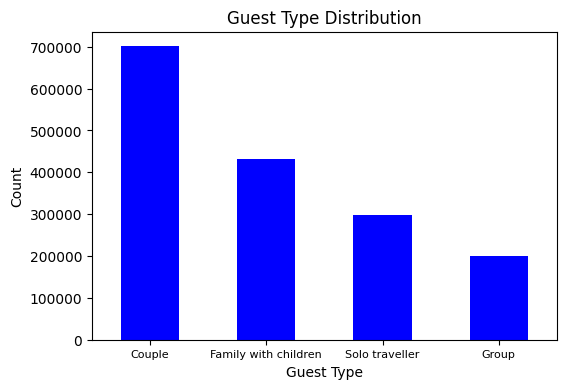

In [78]:
plt.figure(figsize=(6, 4))
train_merge['guest_type'].value_counts().plot(kind='bar', color='blue')
plt.title('Guest Type Distribution')
plt.xlabel('Guest Type')
plt.ylabel('Count')
plt.xticks(fontsize=8)
plt.xticks(rotation=0)
plt.show()


### Visualizing average review score per guest type

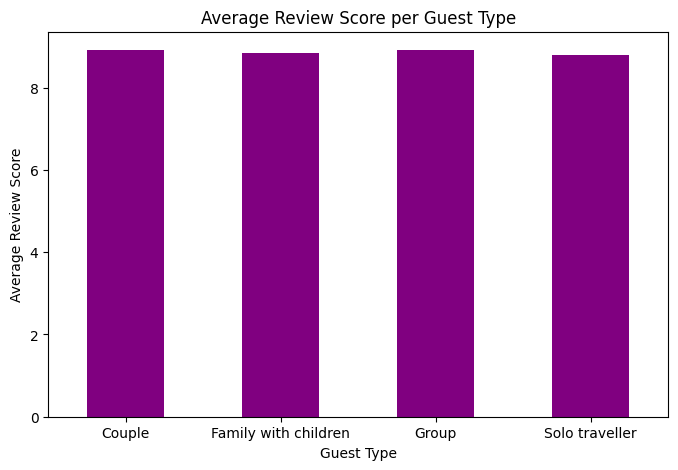

In [79]:
plt.figure(figsize=(8, 5))
train_merge.groupby('guest_type')['review_score'].mean().plot(kind='bar', color='purple')
plt.title('Average Review Score per Guest Type')
plt.ylabel('Average Review Score')
plt.xlabel('Guest Type')
plt.xticks(rotation=0)
plt.show()

### Radar chart for review score statistics

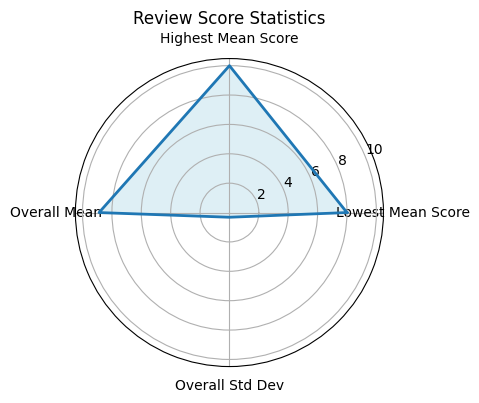

In [80]:
import matplotlib.pyplot as plt
import numpy as np

avg_scores_per_country = train_merge.groupby('guest_country')['review_score'].mean()
std_scores_per_country = train_merge.groupby('guest_country')['review_score'].std()

overall_mean = avg_scores_per_country.mean()
overall_std = avg_scores_per_country.std()

highest_score = avg_scores_per_country.max()
lowest_score = avg_scores_per_country.min()

labels = ['Lowest Mean Score', 'Highest Mean Score', 'Overall Mean', 'Overall Std Dev']
values = [lowest_score, highest_score, overall_mean, overall_std]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

plt.figure(figsize=(4, 4))
plt.subplot(111, polar=True)
plt.plot(angles, values, linewidth=2, linestyle='solid', label='Review Score Stats')

plt.fill(angles, values, color='lightblue', alpha=0.4)
plt.title('Review Score Statistics')
plt.xticks(angles[:-1], labels)

plt.show()


### Displaying unique values per column

In [81]:
from tabulate import tabulate

unique_values = train_merge.nunique()

unique_values_table = unique_values.reset_index()
unique_values_table.columns = ['Column', 'Unique Values']

print(tabulate(unique_values_table, headers='keys', tablefmt='pretty', showindex=False))


+---------------------------+---------------+
|          Column           | Unique Values |
+---------------------------+---------------+
|          user_id          |    1628989    |
|     accommodation_id      |     40000     |
|        guest_type         |       4       |
|       guest_country       |      238      |
|        room_nights        |      72       |
|           month           |      12       |
|    accommodation_type     |      27       |
|   accommodation_country   |      180      |
|    accommodation_score    |      71       |
| accommodation_star_rating |      10       |
|      location_is_ski      |       2       |
|     location_is_beach     |       2       |
|  location_is_city_center  |       2       |
|         review_id         |    1628989    |
|       review_title        |    844148     |
|      review_positive      |    1582370    |
|      review_negative      |    914773     |
|       review_score        |      22       |
|   review_helpful_votes    |     